In [1]:
# importing the necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import numpy as np
import h5py
import os
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
config = {
    "model"            : "vgg16",
    "weights"          : "imagenet",
    
    "features_path"    : "C:/Users/admin/Desktop/Computer Vision + Django/car_damage_check/Severity/features.h5",
    "labels_path"      : "C:/Users/admin/Desktop/Computer Vision + Django/car_damage_check/Severity/labels.h5",
    "classifier_path"  : "C:/Users/admin/Desktop/Computer Vision + Django/car_damage_check/Severity/classifier.pickle",
    "model_path"       : "C:/Users/admin/Desktop/Computer Vision + Django/car_damage_check/Severity/model",
    
    "test_size"        : 0.2,
    "seed"             : 9,
}

In [3]:
# initializing config variables
test_size = config["test_size"]
seed = config["seed"]
features_path = config["features_path"]
labels_path = config["labels_path"]
classifier_path = config["classifier_path"]

In [4]:
# importing the features and labels
h5f_data = h5py.File(features_path, 'r')
h5f_label = h5py.File(labels_path, 'r')

features_string = h5f_data['dataset_1']
labels_string = h5f_label['dataset_1']

features = np.array(features_string)
labels = np.array(labels_string)

h5f_data.close()
h5f_label.close()

In [5]:
# verify the shape of features and labels
print("[INFO] features shape: {}".format(features.shape))
print("[INFO] labels shape: {}".format(labels.shape))

print("[INFO] training started...")

(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(features),
                                                                 np.array(labels),
                                                                 test_size=test_size,
                                                                 random_state=seed)

print("[INFO] splitted train and test data....")
print("[INFO] train data    : {}".format(trainData.shape))
print("[INFO] test data     : {}".format(testData.shape))
print("[INFO] train labels  : {}".format(trainLabels.shape))
print("[INFO] test labels   : {}".format(testLabels.shape))

[INFO] features shape: (979, 4096)
[INFO] labels shape: (979,)
[INFO] training started...
[INFO] splitted train and test data....
[INFO] train data    : (783, 4096)
[INFO] test data     : (196, 4096)
[INFO] train labels  : (783,)
[INFO] test labels   : (196,)


In [6]:
# Logistic Regression as model
model = LogisticRegression(random_state = seed)
model.fit(trainData, trainLabels)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=9, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
# evaluate the model on test data
preds = model.predict(testData)

In [8]:
preds.shape

(196,)

In [9]:
# dump classifier to the file
print("Saving the model....")
pickle.dump(model, open(classifier_path, 'wb'))

Saving the model....


In [10]:
# plot the confusion matrix
cm = confusion_matrix(testLabels, preds)

In [11]:
cm

array([[29, 16,  5],
       [ 9, 35, 16],
       [ 3, 17, 66]], dtype=int64)

In [12]:
accuracy = ((29 + 35 + 66)/196)*100

In [13]:
accuracy

66.3265306122449

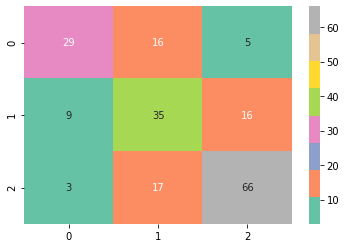

In [14]:
sns.heatmap(cm, annot=True, cmap="Set2")
plt.show()